In [6]:
import numpy as np
import matplotlib.pyplot as plt
processed = np.genfromtxt('processed.txt', delimiter=',')
with open('row.txt', 'r', encoding='utf-8') as f:
    countries = [line.strip() for line in f if line.strip()]

with open('column.txt', 'r', encoding='utf-8') as f:
    variables = [line.strip() for line in f if line.strip()]

print(processed)


[[-0.87145   -0.64557   -0.41296   -0.31719    0.8383     1.2935
   1.2966   ]
 [-0.36505   -0.7508    -0.2743    -0.23353    0.8383     0.39242
   0.042894 ]
 [ 0.27921    0.71913    0.50081    0.032421   0.51079   -1.1249
  -0.86926  ]
 [-0.42413   -0.67172    0.088196  -0.059363   0.75864    0.36335
   1.0637   ]
 [ 0.4677     1.2931    -0.40962   -0.30877   -0.24604   -1.1162
  -0.80133  ]
 [-0.15123   -0.7221    -0.29435   -0.25027    0.24081    0.13081
  -0.54903  ]
 [-0.65201   -0.62007   -0.41129   -0.30556    0.79404    0.68019
   2.5212   ]
 [ 2.1782    -0.10989   -0.39625   -0.2609     0.023936  -0.44765
  -0.52186  ]
 [ 0.79968    0.46405   -0.37453   -0.27154   -0.0070453 -0.24708
  -0.56456  ]
 [-0.57886   -0.30121   -0.31106   -0.26691   -0.84354   -0.96797
  -0.35108  ]
 [-0.54791   -0.79863   -0.23421   -0.22855    0.79404   -0.037789
   0.062302 ]
 [-0.75329   -0.66471   -0.23588   -0.24761    0.8383     0.46218
   0.79396  ]
 [ 0.72653    2.2496    -0.20247   -0.2445

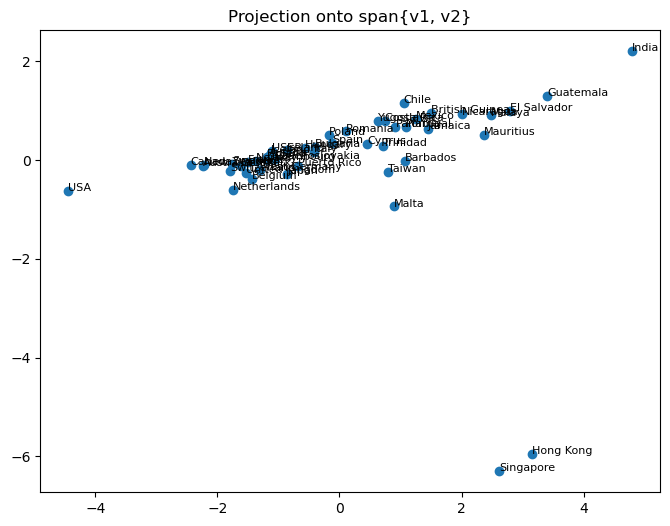

In [10]:
U , S, V_t = np.linalg.svd(processed, full_matrices=False)
V = V_t.T

x_coords = S[0] * U[:, 0]
y_coords = S[1] * U[:, 1]

plt.figure(figsize=(8,6))
plt.scatter(x_coords, y_coords)

for i, name in enumerate(countries):
    plt.text(x_coords[i], y_coords[i], name, fontsize=8)

plt.title('Projection onto span{v1, v2}')
plt.show()

### 1 （3）

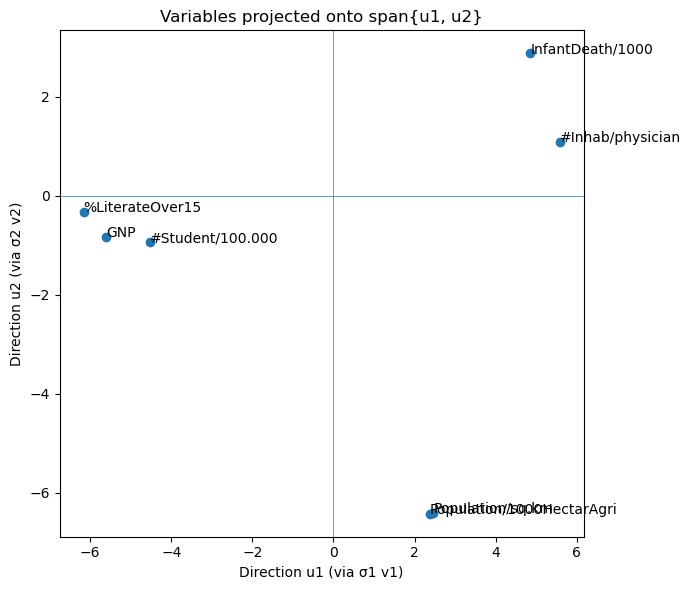

In [11]:
xv = S[0] * V[:, 0]
yv = S[1] * V[:, 1]

plt.figure(figsize=(7,6))
plt.scatter(xv, yv)
for j, name in enumerate(variables):
    plt.text(xv[j], yv[j], name, fontsize=10)
plt.xlabel('Direction u1 (via σ1 v1)')
plt.ylabel('Direction u2 (via σ2 v2)')
plt.title('Variables projected onto span{u1, u2}')
plt.axhline(0, lw=0.5)
plt.axvline(0, lw=0.5)
plt.tight_layout()
plt.show()

### 1 (4)


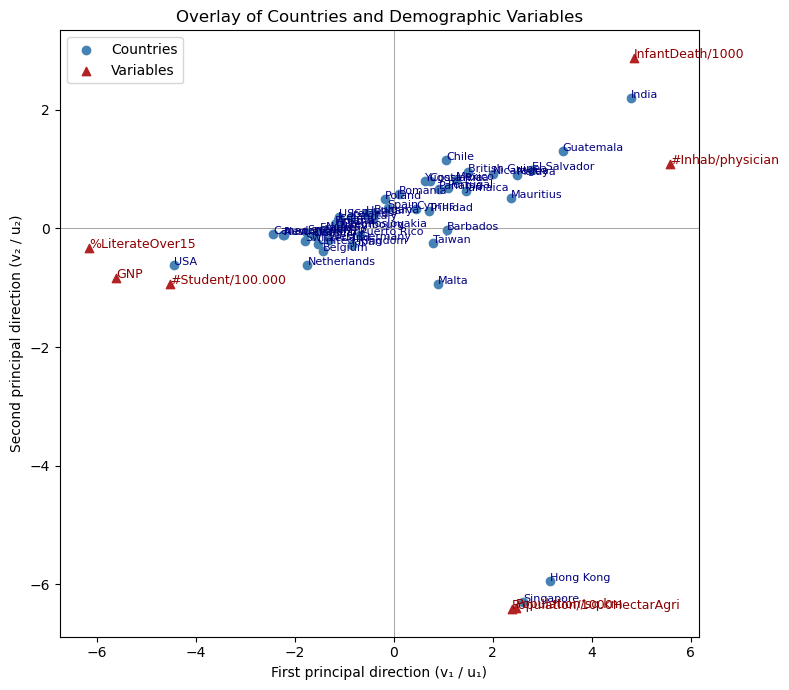

Hong Kong is close to variable 'Population/sq.km' — likely explains its outlier position.
Singapore is close to variable 'Population/sq.km' — likely explains its outlier position.


In [12]:
# ------------------------------------------------------------
# (d) Overlay the two graphs from (b) and (c)
# ------------------------------------------------------------
x_country = S[0] * U[:, 0]
y_country = S[1] * U[:, 1]
x_var = S[0] * V[:, 0]
y_var = S[1] * V[:, 1]
plt.figure(figsize=(8, 7))

# Plot country points (from part b)
plt.scatter(x_country, y_country, color='steelblue', label='Countries')
for i, name in enumerate(countries):
    plt.text(x_country[i], y_country[i], name, fontsize=8, color='navy')

# Plot variable points (from part c)
plt.scatter(x_var, y_var, color='firebrick', marker='^', label='Variables')
for j, name in enumerate(variables):
    plt.text(x_var[j], y_var[j], name, fontsize=9, color='darkred')

# Add plot styling
plt.axhline(0, color='gray', lw=0.5)
plt.axvline(0, color='gray', lw=0.5)
plt.xlabel('First principal direction (v₁ / u₁)')
plt.ylabel('Second principal direction (v₂ / u₂)')
plt.title('Overlay of Countries and Demographic Variables')
plt.legend()
plt.tight_layout()
plt.show()

# ------------------------------------------------------------
# Identify which variables are near the two outlier countries
# (Optional: can help interpret the result numerically)
# ------------------------------------------------------------
# Compute Euclidean distance between each variable and each outlier
outlier_idx = np.argsort(np.sqrt(x_country**2 + y_country**2))[-2:]
for idx in outlier_idx:
    country = countries[idx]
    cx, cy = x_country[idx], y_country[idx]
    dists = np.sqrt((x_var - cx)**2 + (y_var - cy)**2)
    nearest_var = variables[np.argmin(dists)]
    print(f"{country} is close to variable '{nearest_var}' — likely explains its outlier position.")
